In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Cancellation Reasons:**
<ul>
<li>(A) Air Carrier</li>
<li>(B) Extreme Weather</li>
<li>(C) National Aviation System (NAS)</li>
<li>(D) Security</li>
</ul>

In [2]:
df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\flights.csv", header = 0, low_memory=False)
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Data Cleansing<h3>

In [4]:
df.fillna(0, inplace=True)
df['month_s'] = pd.to_datetime(df['MONTH'], format='%m').dt.month_name().str.slice(stop=3)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,month_s
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Jan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Jan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Jan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Jan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Jan


<h3>Insights<h3>

In [15]:
delays = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
cancel_diverted = ['DIVERTED','CANCELLED']
all_variables = ['DIVERTED','CANCELLED','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

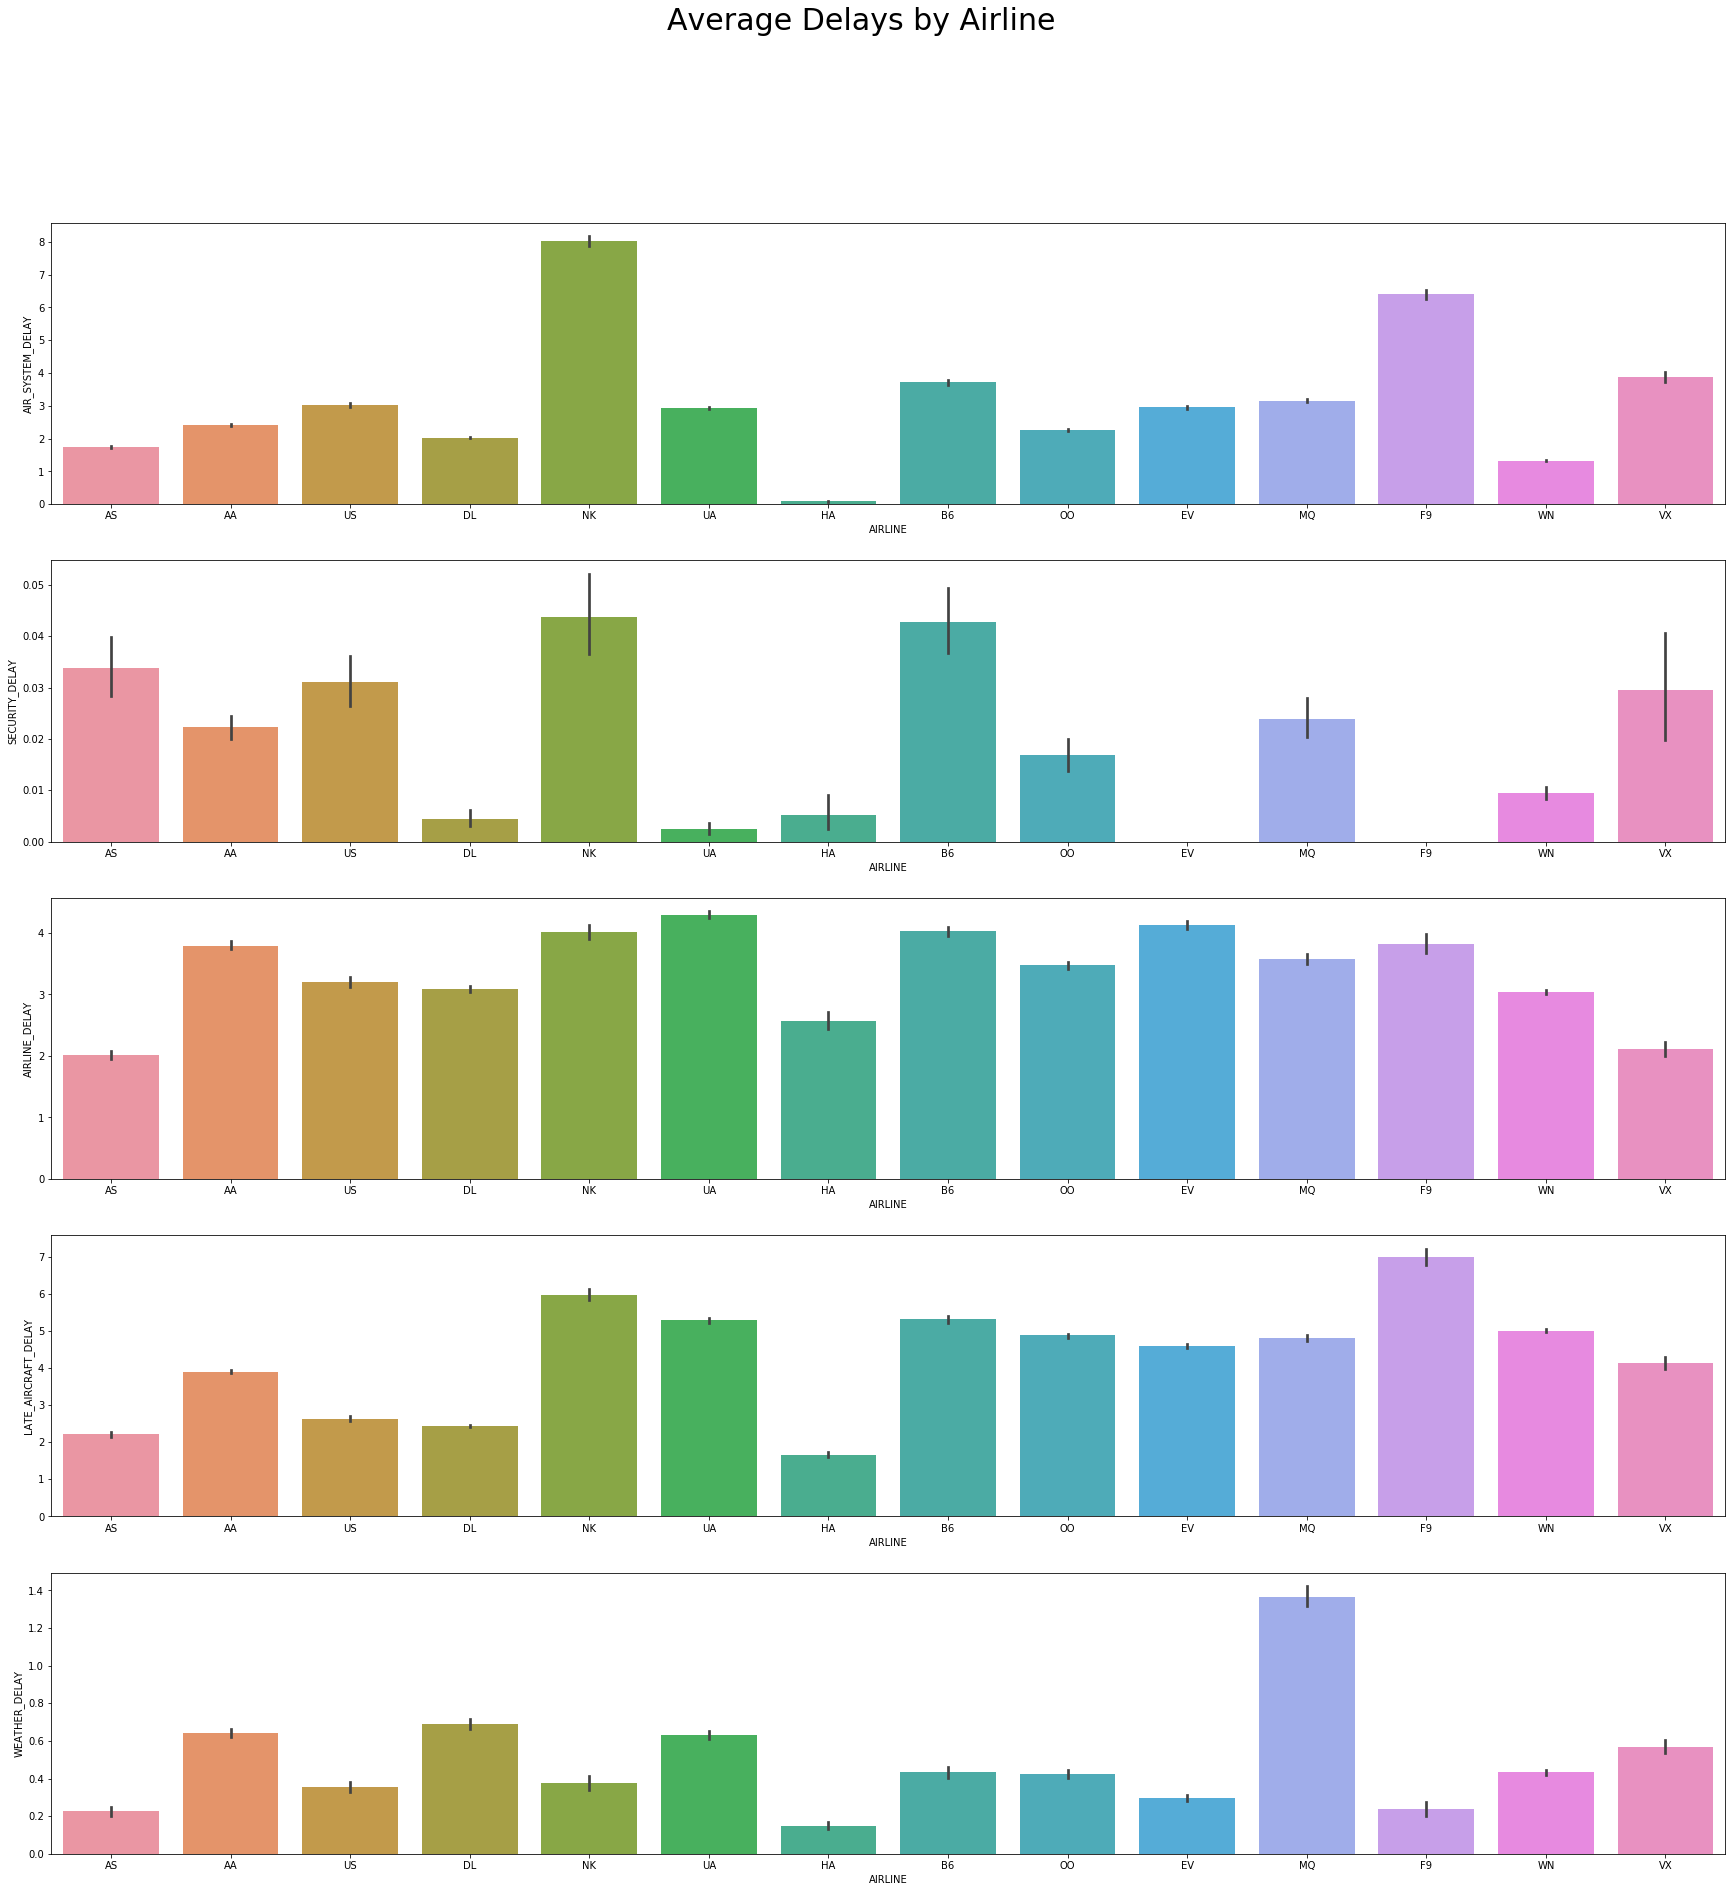

In [8]:
delays = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

fig, axes = plt.subplots(5,1,figsize=(30,30))
plt.suptitle("Average Delays by Airline", fontsize=30)
#axes=axes.flatten()
for i, column in enumerate(delays):
    sns.barplot(x='AIRLINE',y=column, data=df, ax=axes[i])

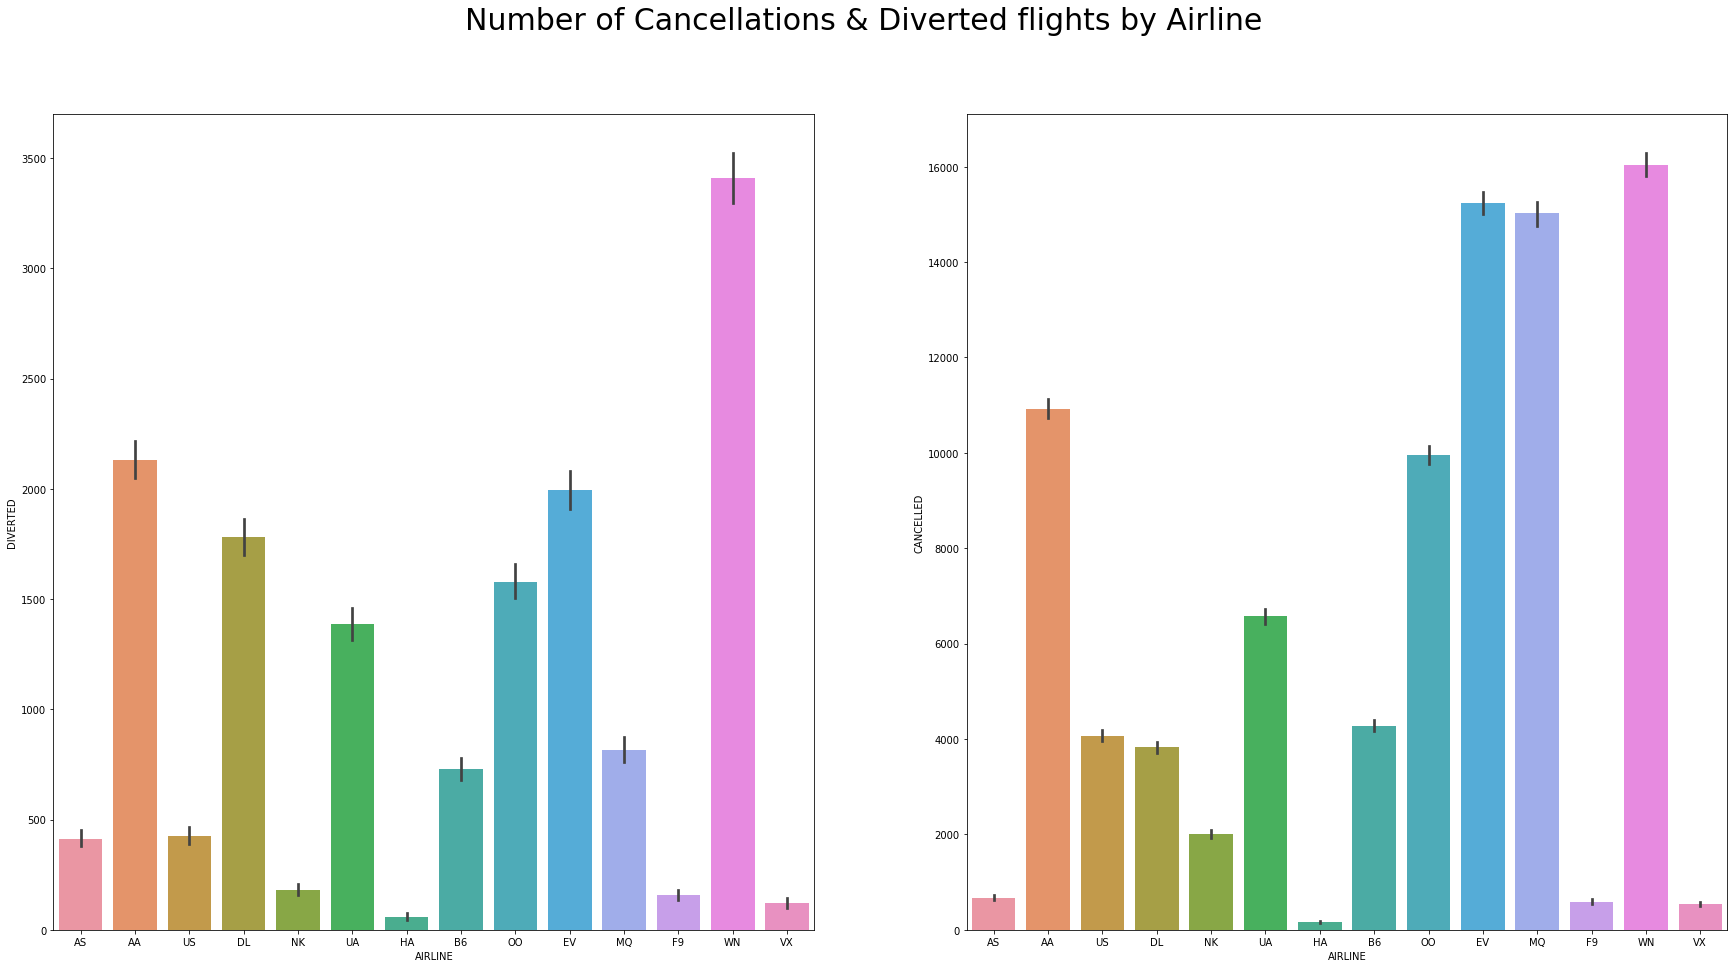

In [7]:
cancel_diverted = ['DIVERTED','CANCELLED']

fig, axes = plt.subplots(1,2,figsize=(30,15))
plt.suptitle("Number of Cancellations & Diverted flights by Airline", fontsize=30)
axes=axes.flatten()
for i, column in enumerate(cancel_diverted):
    sns.barplot(x='AIRLINE',y=column, data=df, ax=axes[i], estimator=sum)

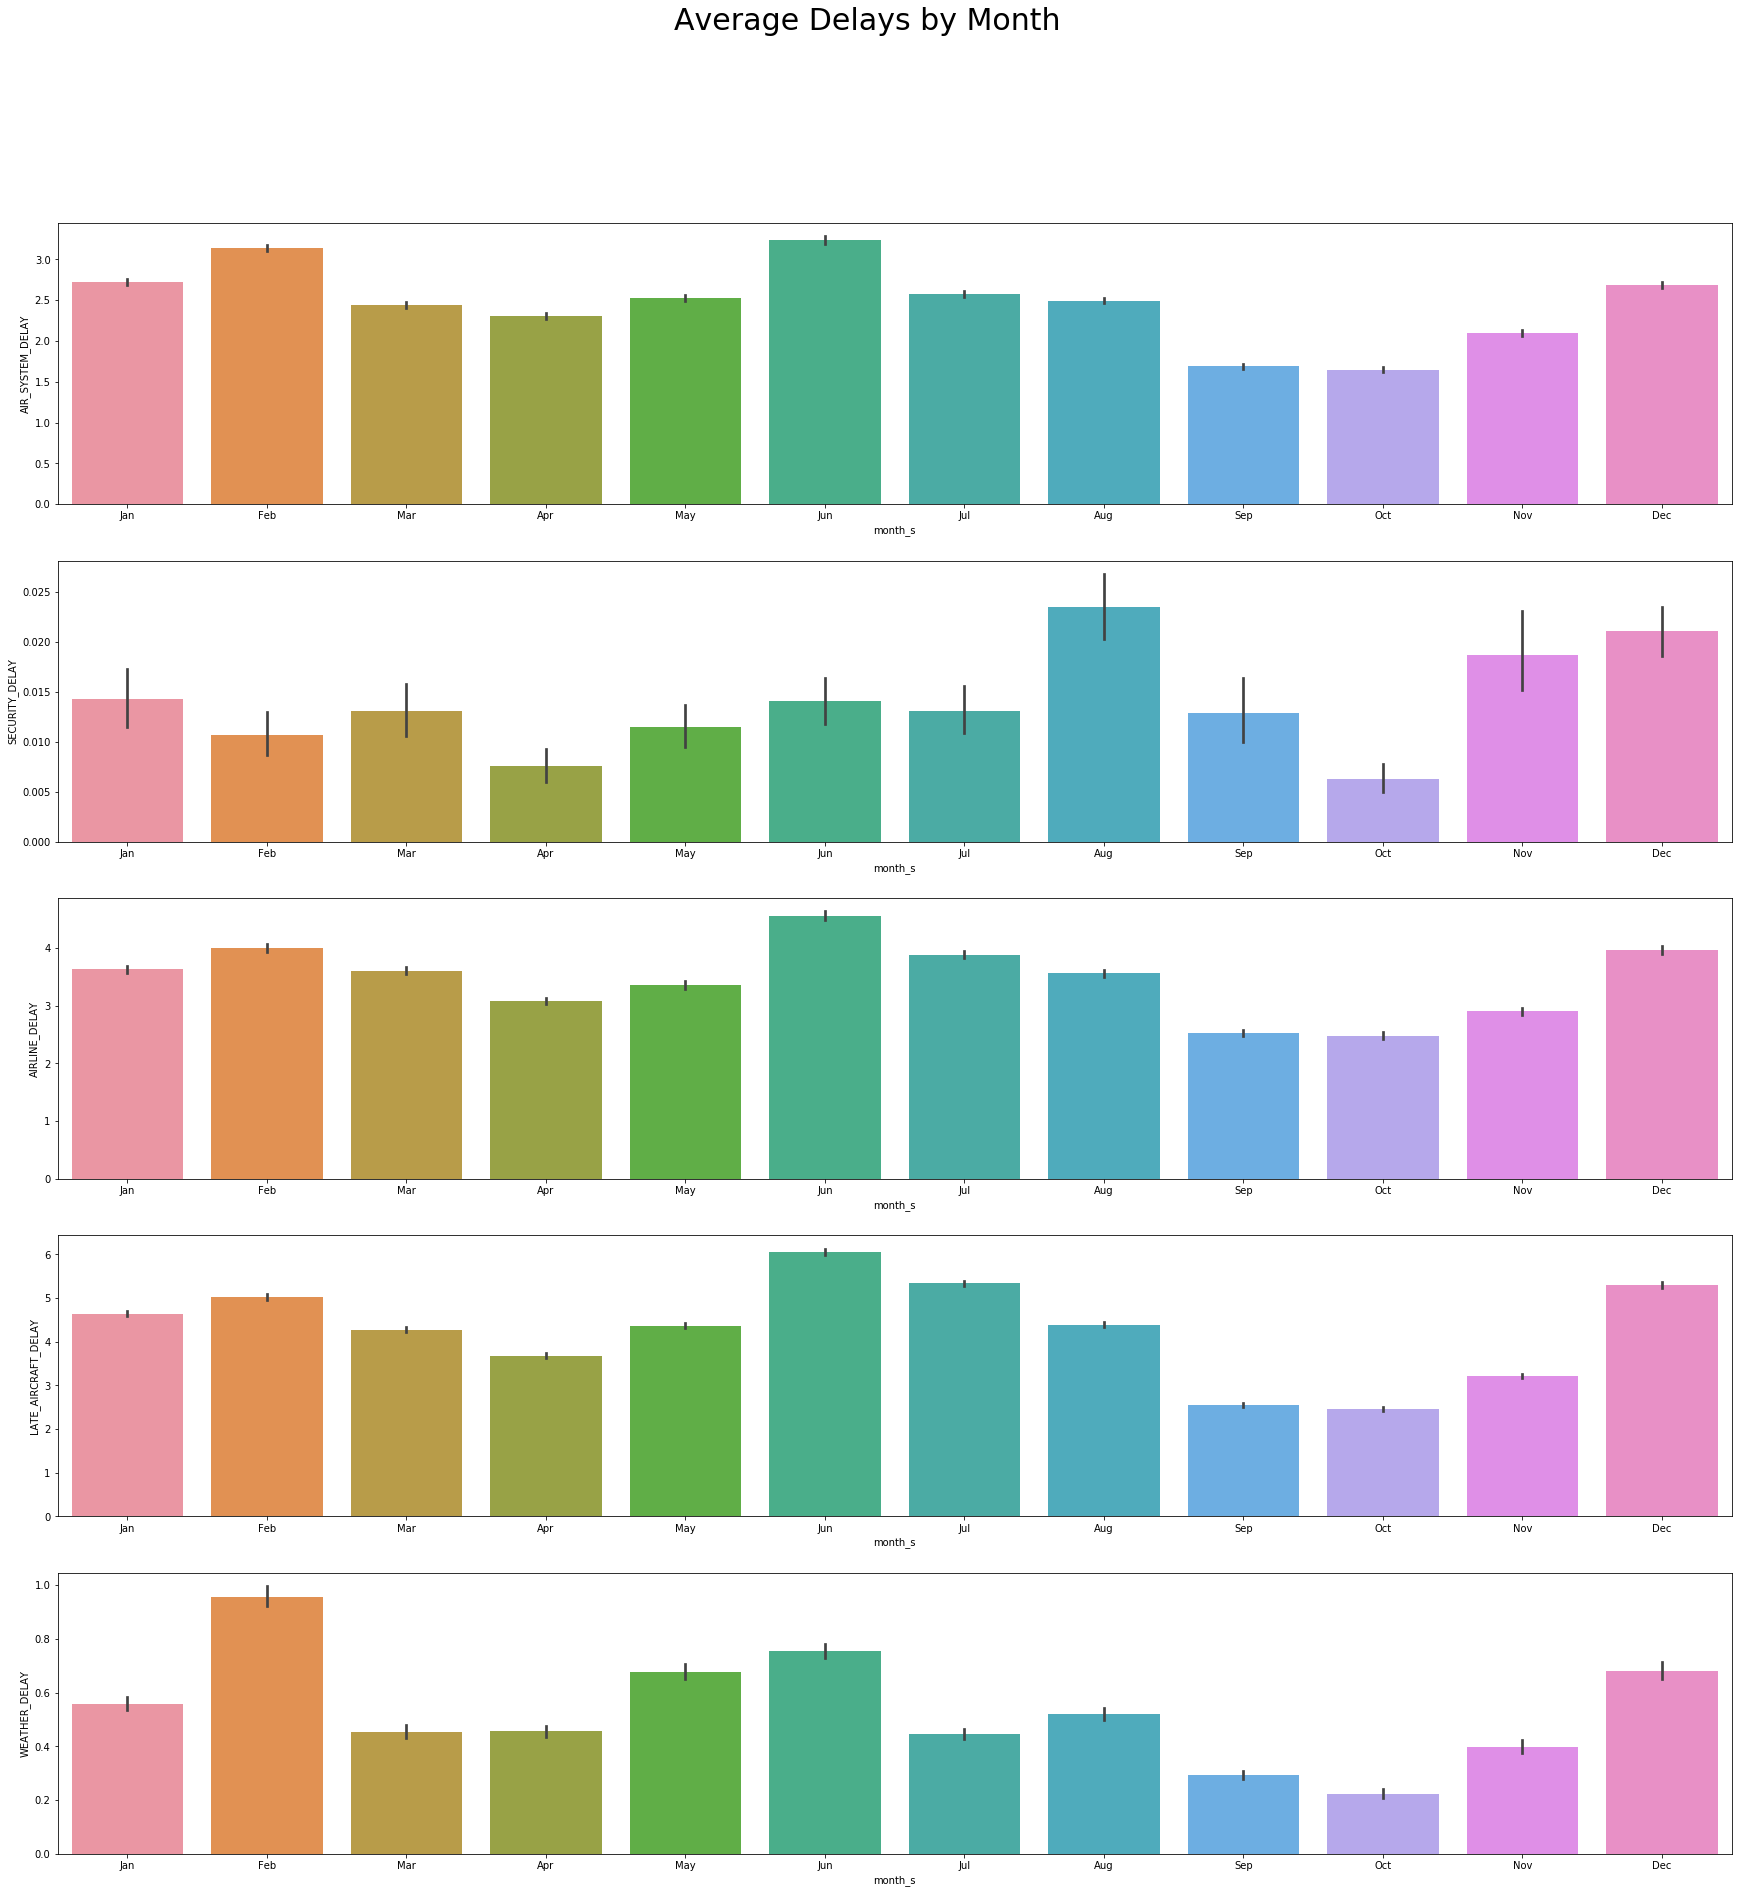

In [9]:
fig, axes = plt.subplots(5,1,figsize=(30,30))
plt.suptitle("Average Delays by Month", fontsize=30)
for i, column in enumerate(delays):
    sns.barplot(x='month_s',y=column, data=df, ax=axes[i])

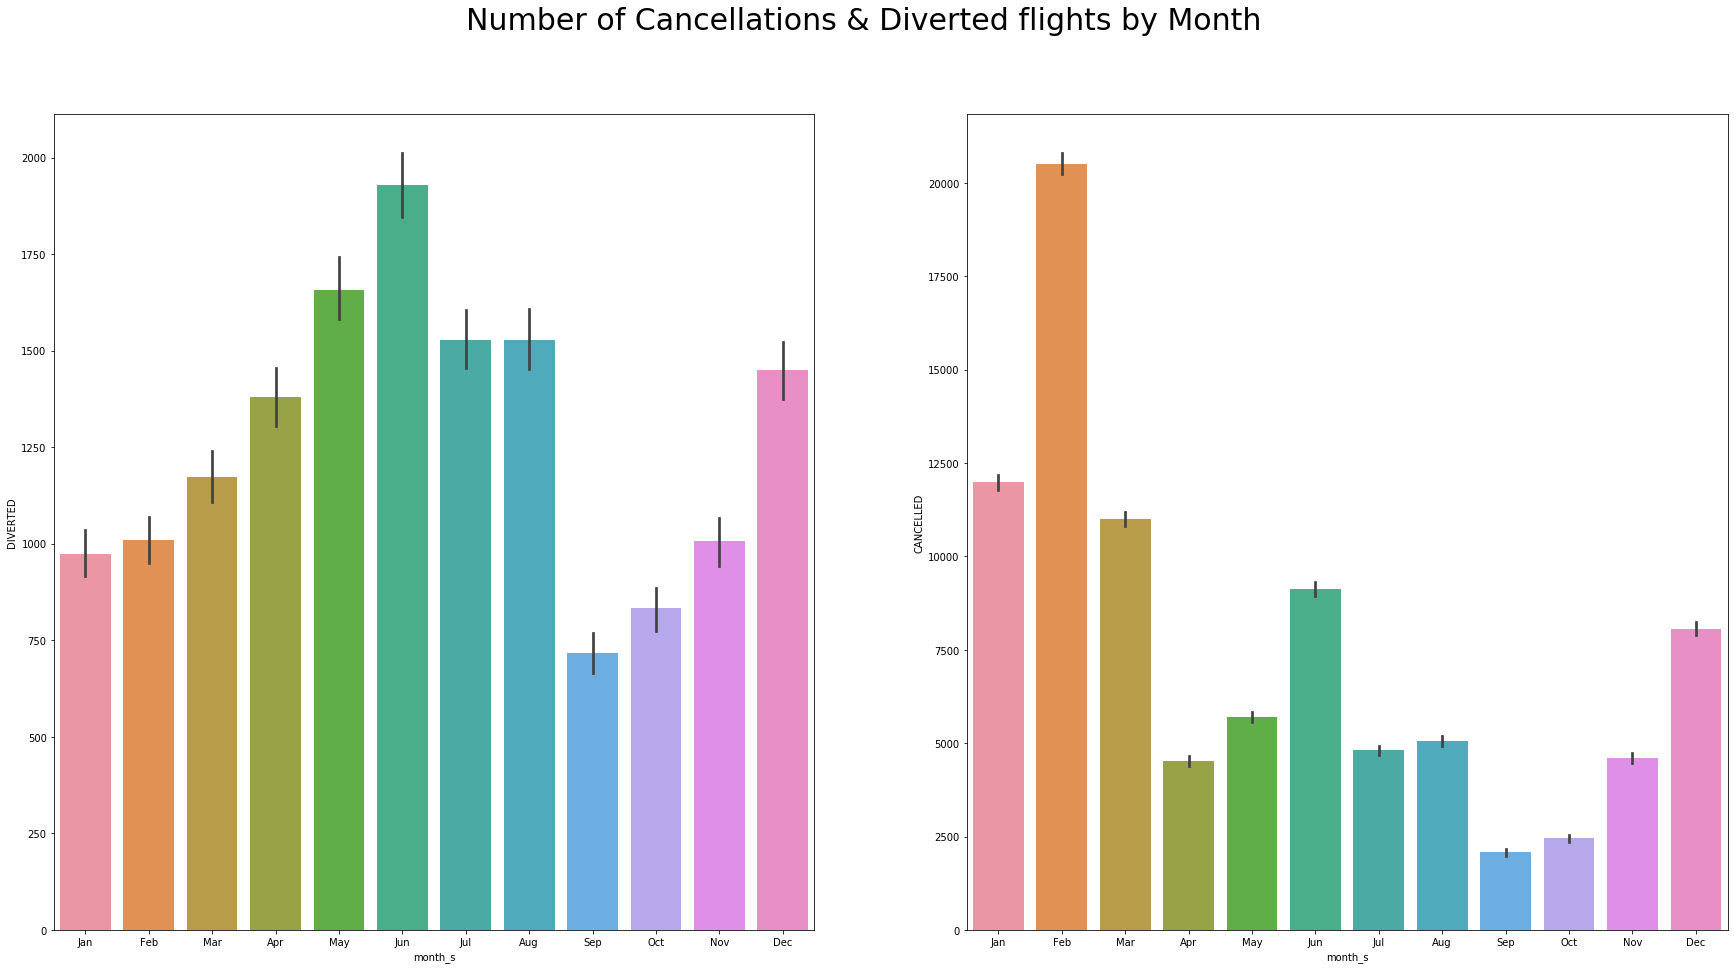

In [11]:
fig, axes = plt.subplots(1,2,figsize=(30,15))
plt.suptitle("Number of Cancellations & Diverted flights by Month", fontsize=30)
axes=axes.flatten()
for i, column in enumerate(cancel_diverted):
    sns.barplot(x='month_s',y=column, data=df, ax=axes[i], estimator=sum)

<h3>Deep dive into American Airlines (AA) and American Eagle Airlines (MQ)<h3>

In [16]:
newdf=df[df.AIRLINE.isin(['AA','MQ'])]

#number of times AA and MQ had to cancel or divert a flight in 2015
#total number of minutes AA and MQ have delayed a flight
sums_newdf = newdf.groupby(["AIRLINE"]).sum()[all_variables]
sums_newdf

,DIVERTED,CANCELLED,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
AIRLINE,,,,,,,,
AA,2130,10919,2460604.0,1760561.0,16158.0,2753994.0,2833302.0,467420.0
MQ,816,15025,1800397.0,930774.0,7049.0,1055033.0,1417073.0,402305.0


In [17]:
#average number of minutes AA and MQ have delayed a flight
avg_newdf = newdf.groupby(["AIRLINE"]).mean()[delays]
avg_newdf

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
AIRLINE,,,,,
AA,2.425069,0.022257,3.793464,3.902706,0.643843
MQ,3.159107,0.023925,3.580850,4.809637,1.365449


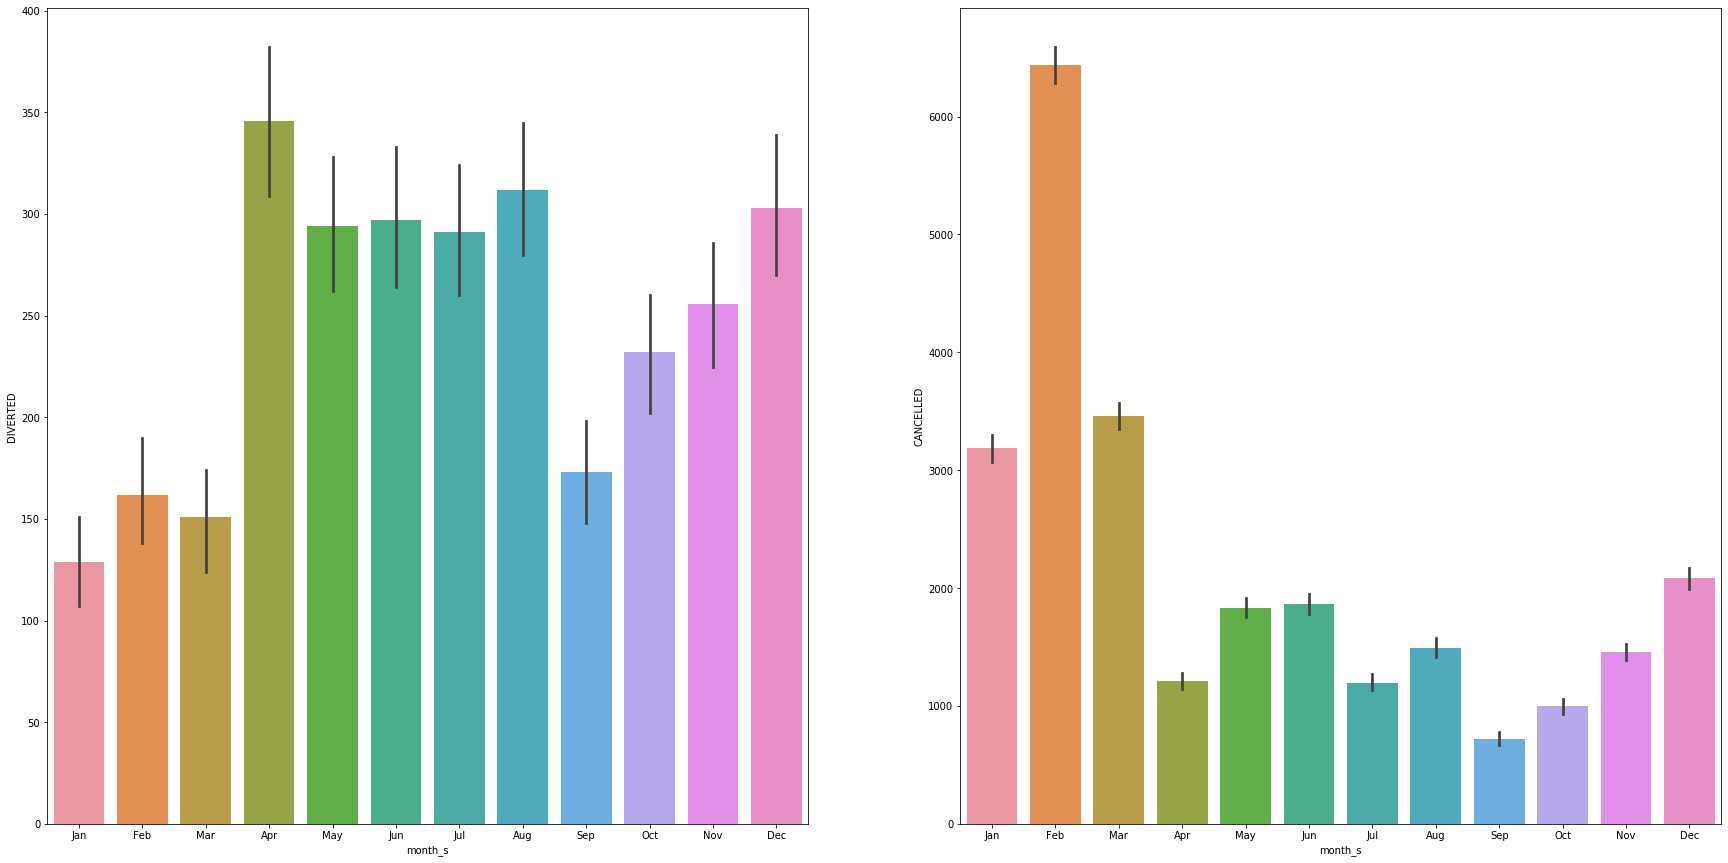

In [19]:
#number of diverted AA and MQ flights and cancellations by month
fig, axes = plt.subplots(1,2,figsize=(30,15))
axes=axes.flatten()
for i, column in enumerate(cancel_diverted):
    sns.barplot(x='month_s',y=column, data=newdf, ax=axes[i], estimator=sum)

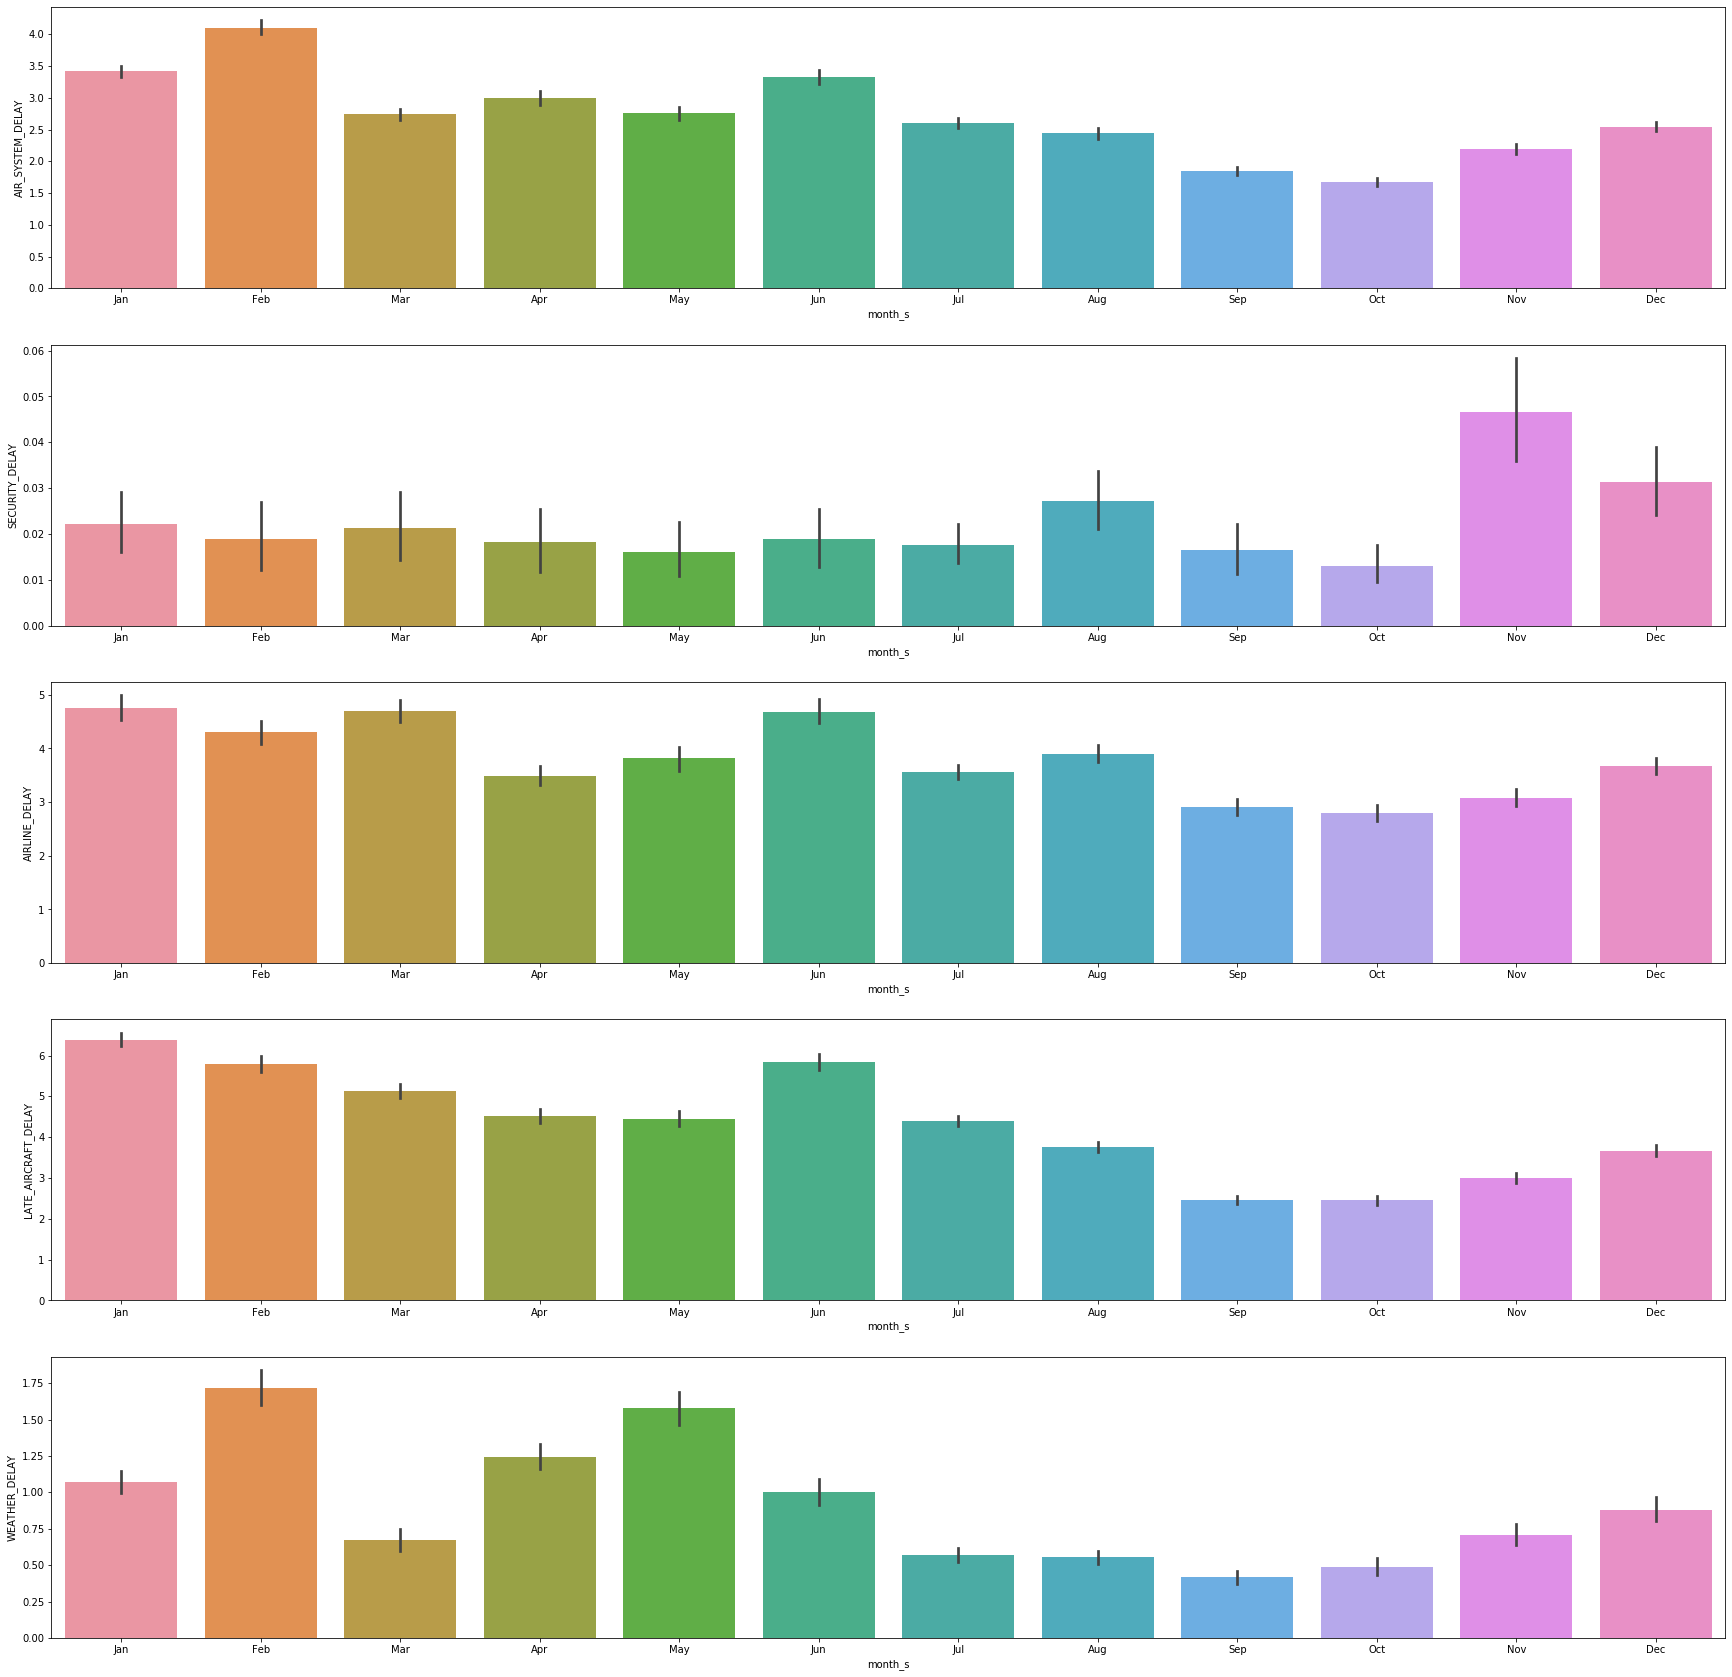

In [20]:
#average number of minutes of delayed flights for AA and MQ by month
fig, axes = plt.subplots(5,1,figsize=(30,30))
for i, column in enumerate(delays):
    sns.barplot(x='month_s',y=column, data=newdf, ax=axes[i])

**Cancellation Reasons:**
<ul>
<li>(A) Air Carrier</li>
<li>(B) Extreme Weather</li>
<li>(C) National Aviation System (NAS)</li>
<li>(D) Security</li>
</ul>

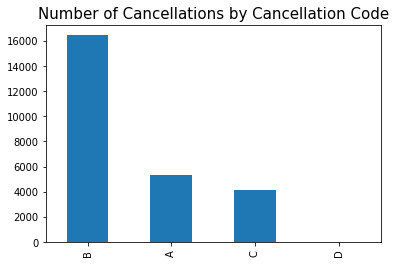

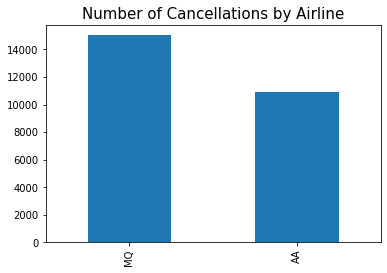

In [31]:
cancelcodes_df=newdf[newdf.CANCELLATION_REASON.isin(['A','B','C','D'])]

#plt.suptitle("Number of Cancellations by Cancellation Code", fontsize=30)
fig, axes = plt.subplots()
plt.figure(2)
plt.title("Number of Cancellations by Airline", fontsize=15)
cancelcodes_df['AIRLINE'].value_counts().plot.bar()
plt.figure(1)
plt.title("Number of Cancellations by Cancellation Code", fontsize=15)
cancelcodes_df['CANCELLATION_REASON'].value_counts().plot.bar()
plt.show()
fig.tight_layout()


**(A) Air Carrier**

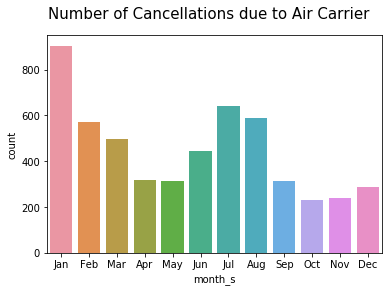

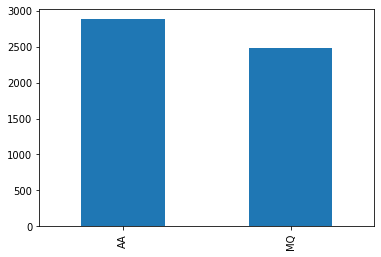

In [32]:
#newdf.sort_values(by=['MONTH','AIRLINE'],ascending=True, inplace=False)

cancelcode_a=newdf[newdf.CANCELLATION_REASON.isin(['A'])]

fig, axes = plt.subplots()
plt.suptitle("Number of Cancellations due to Air Carrier", fontsize=15)

plt.figure(2)
cancelcode_a['AIRLINE'].value_counts().plot.bar()
plt.figure(1)
sns.countplot(x='month_s',data=cancelcode_a)
plt.show()
fig.tight_layout()

**(B) Extreme Weather**

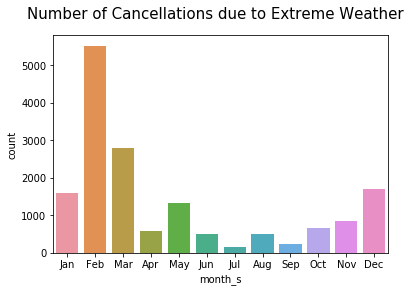

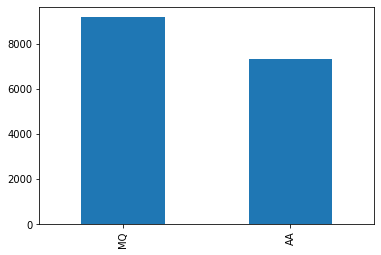

In [33]:
cancelcode_b=newdf[newdf.CANCELLATION_REASON.isin(['B'])]

fig, axes = plt.subplots()
plt.suptitle("Number of Cancellations due to Extreme Weather", fontsize=15)

plt.figure(2)
cancelcode_b['AIRLINE'].value_counts().plot.bar()
plt.figure(1)
sns.countplot(x='month_s',data=cancelcode_b)
plt.show()
fig.tight_layout()

**(C) National Aviation System (NAS)**

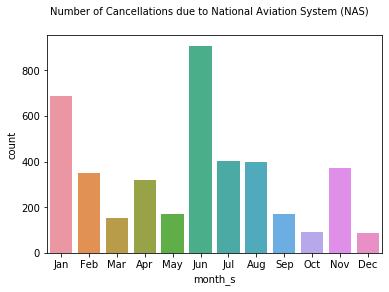

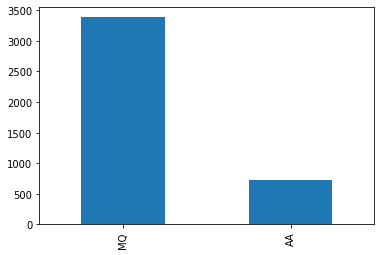

In [35]:
cancelcode_c=newdf[newdf.CANCELLATION_REASON.isin(['C'])]

fig, axes = plt.subplots()
plt.suptitle("Number of Cancellations due to National Aviation System (NAS)", fontsize=10)

plt.figure(2)
cancelcode_c['AIRLINE'].value_counts().plot.bar()
plt.figure(1)
sns.countplot(x='month_s',data=cancelcode_c)
plt.show()
fig.tight_layout()

**(D) Security**

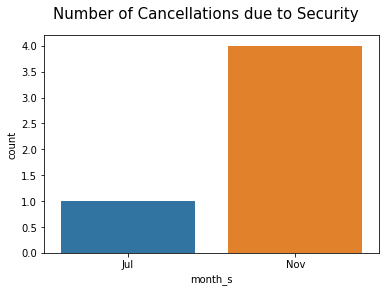

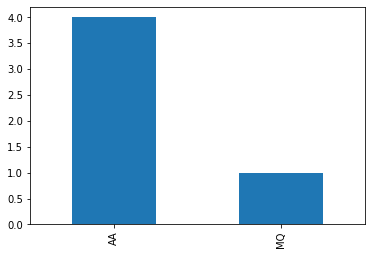

In [36]:
cancelcode_d=newdf[newdf.CANCELLATION_REASON.isin(['D'])]

fig, axes = plt.subplots()
plt.suptitle("Number of Cancellations due to Security", fontsize=15)

plt.figure(2)
cancelcode_d['AIRLINE'].value_counts().plot.bar()
plt.figure(1)
sns.countplot(x='month_s',data=cancelcode_d)
plt.show()
fig.tight_layout()

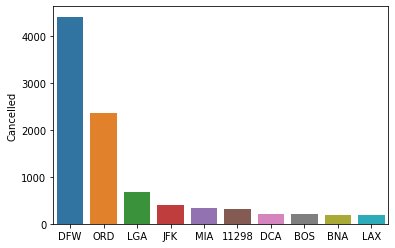

In [39]:
#top 10 cancellations at origin airport due to extreme weather
s_sums=cancelcode_b['ORIGIN_AIRPORT'].value_counts()
s_sumsdf=pd.DataFrame({'Cancelled':s_sums})
s_top=s_sumsdf.head(10)
s_top
sns.barplot(x=s_top.index, y='Cancelled', data=s_top)
plt.show()

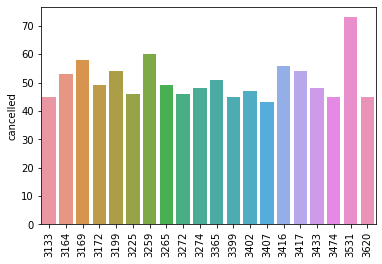

In [40]:
#top 20 tail numbers with cancellations for AA and MQ
c_sums=cancelcodes_df['FLIGHT_NUMBER'].value_counts()
c_sumsdf=pd.DataFrame({'cancelled':c_sums})
c_top2=c_sumsdf.head(20)
chart=sns.barplot(x=c_top2.index, y='cancelled',data=c_top2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()